In [41]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
tmp = torch.load('./test.pt',map_location=torch.device('cpu'))

[N/batch, layer_num, batch, sequence_length, token_dimension]

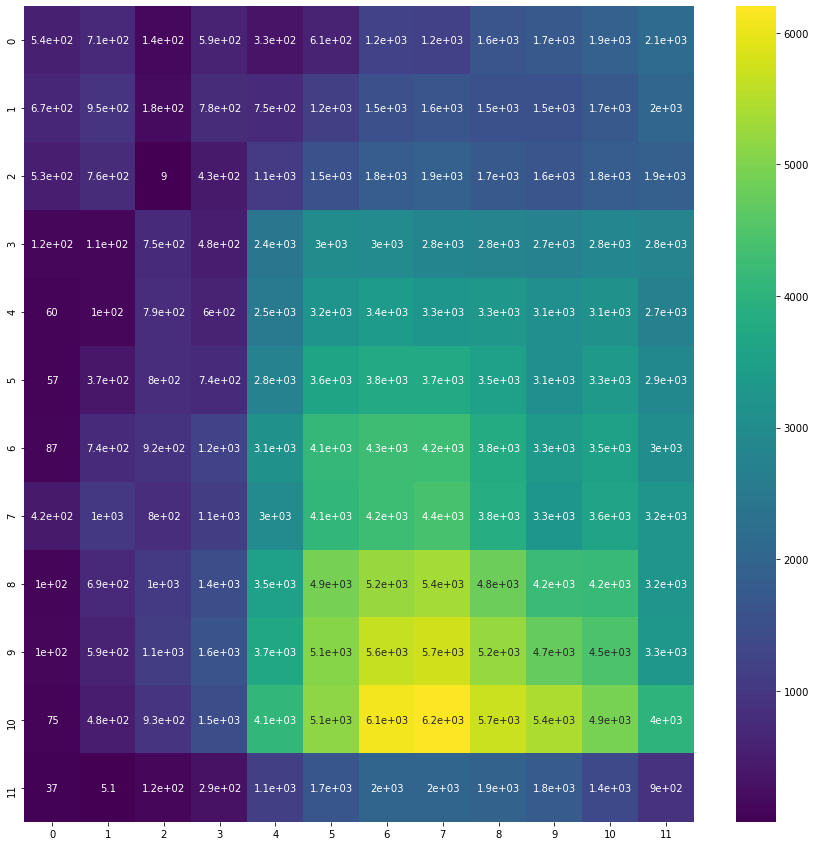

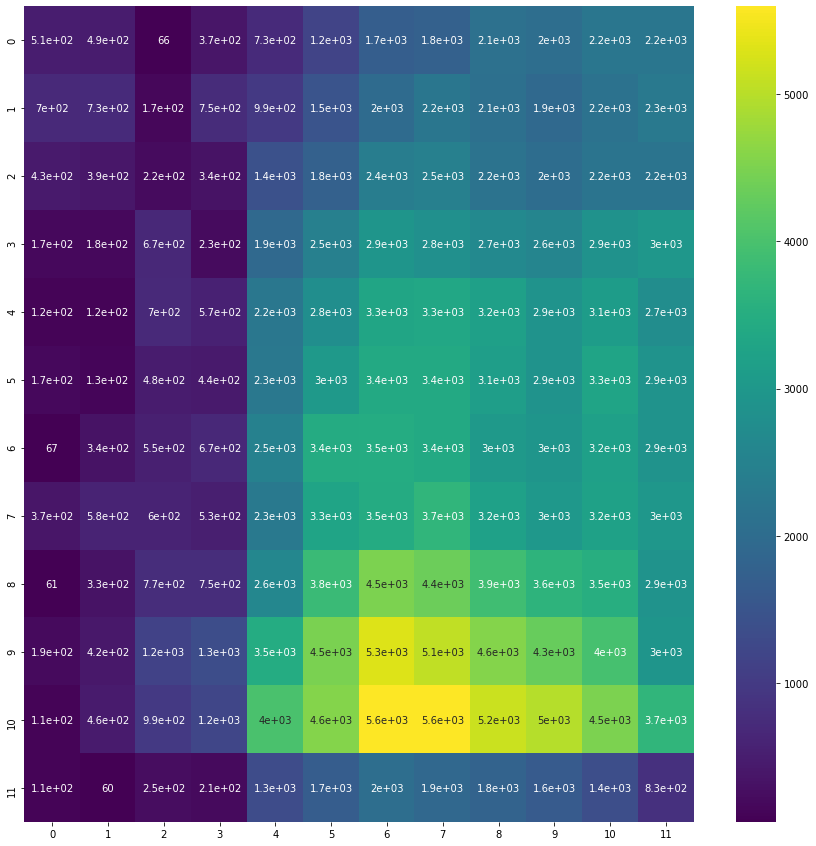

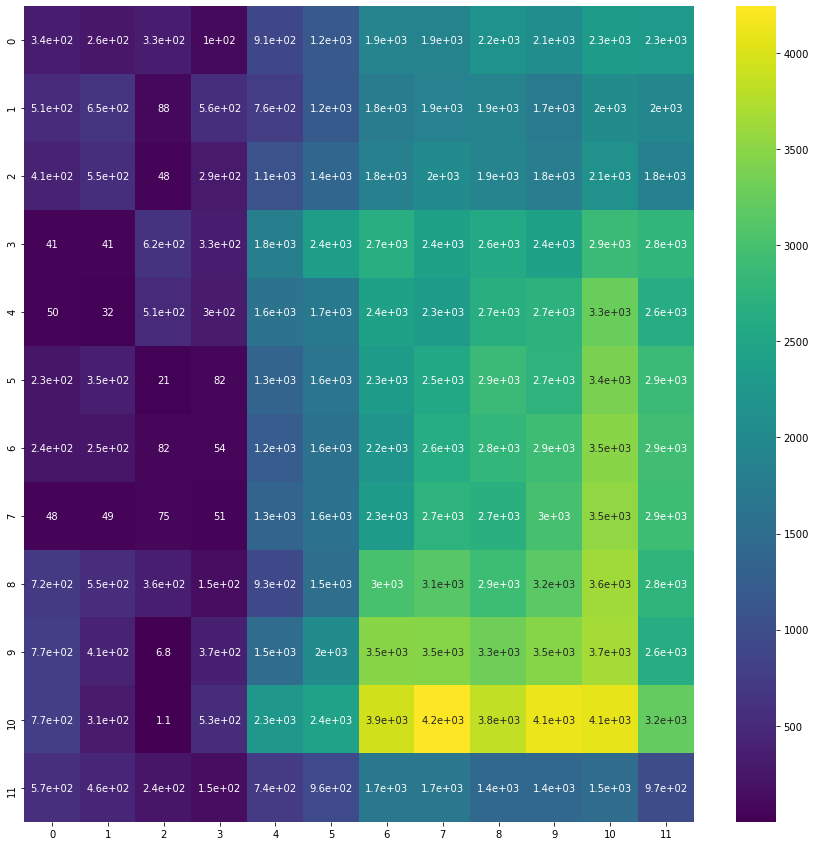

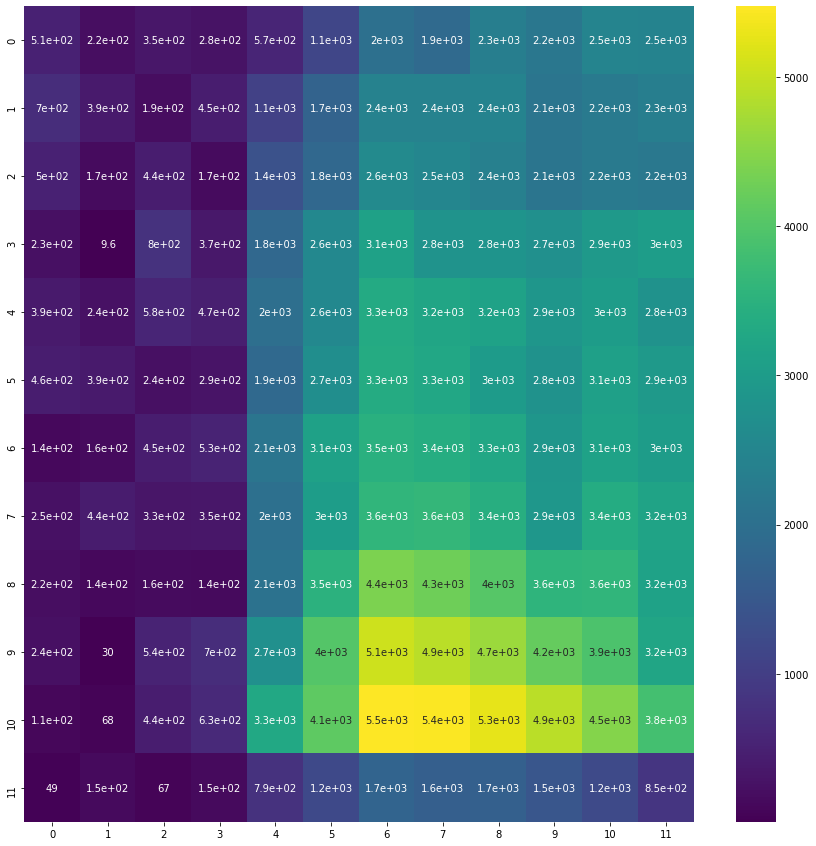

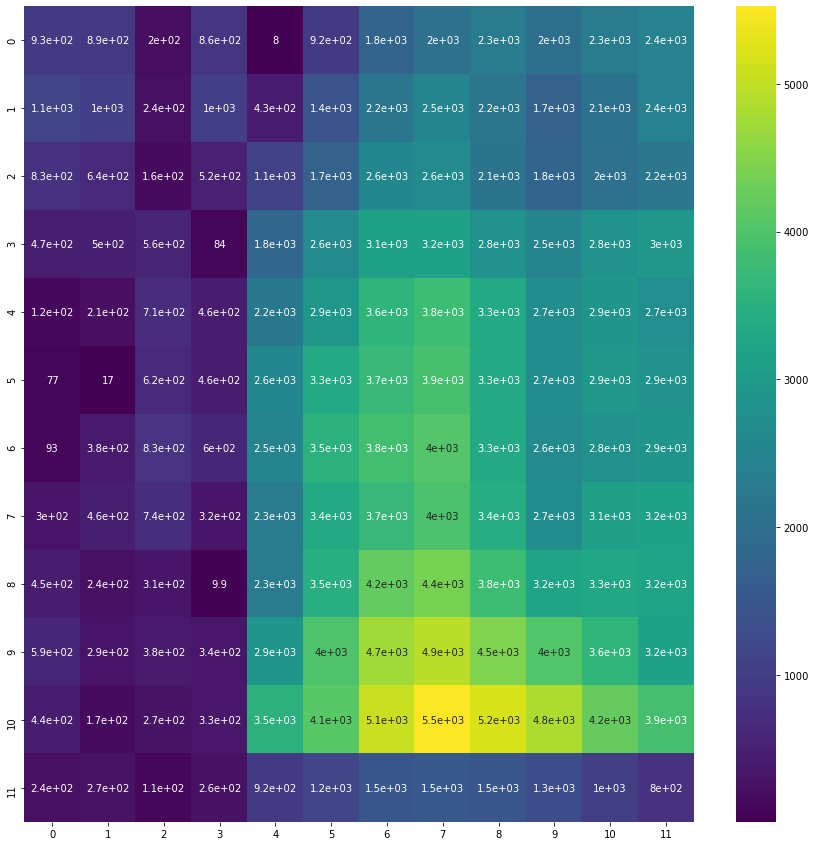

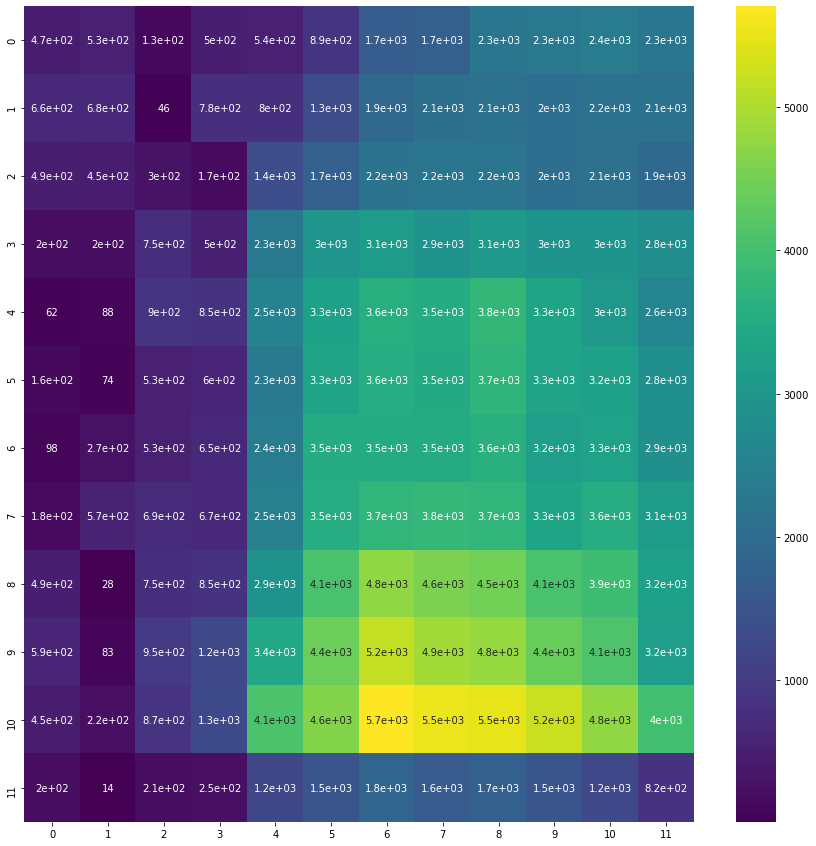

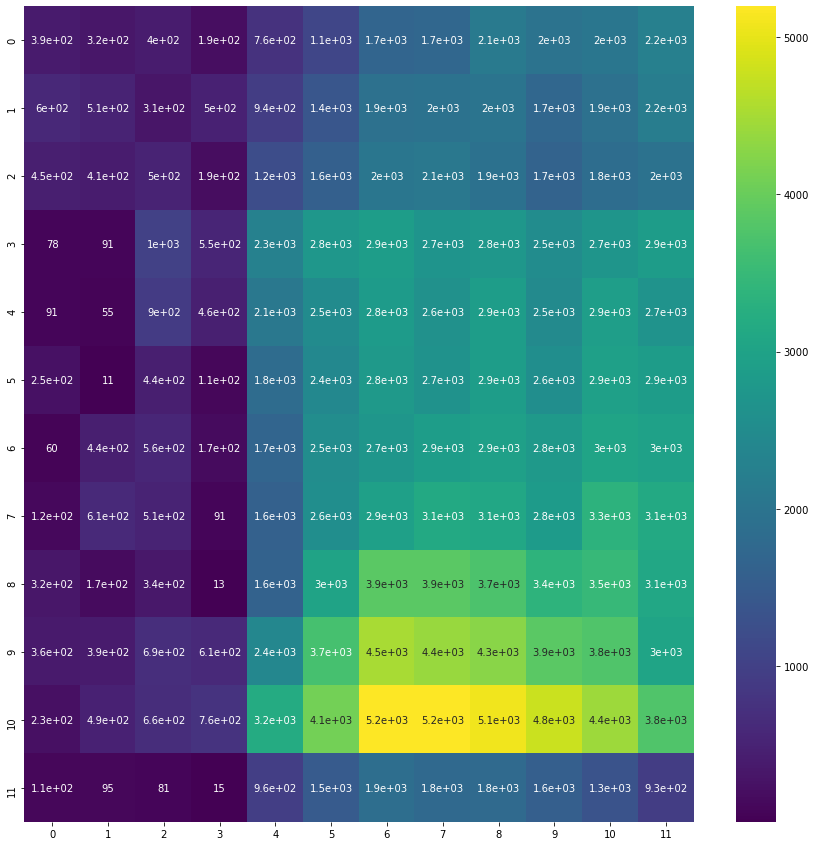

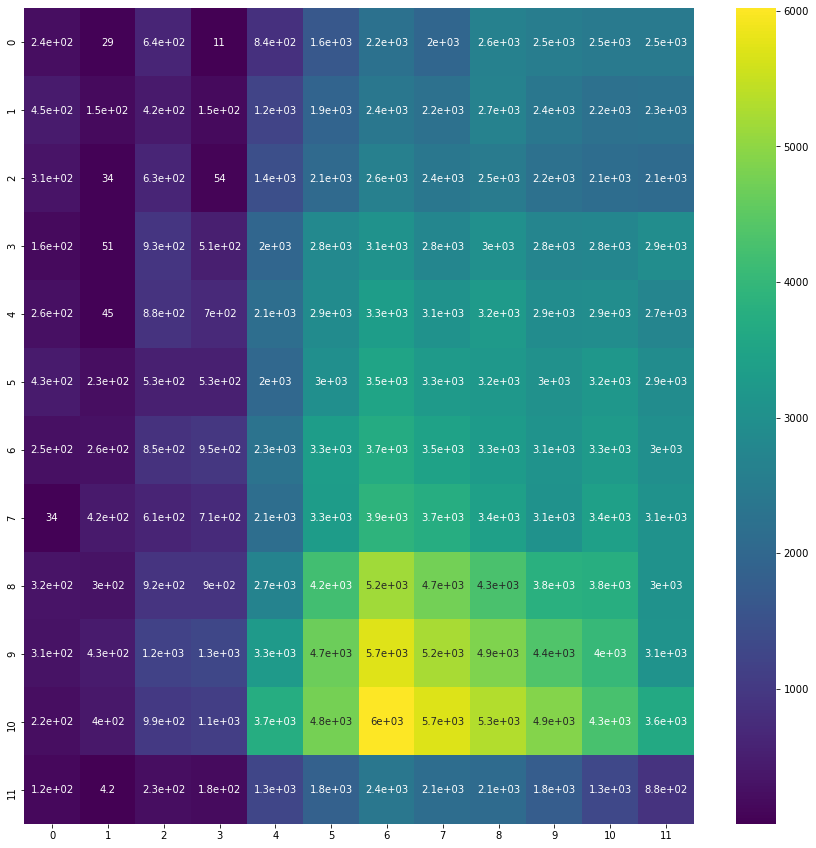

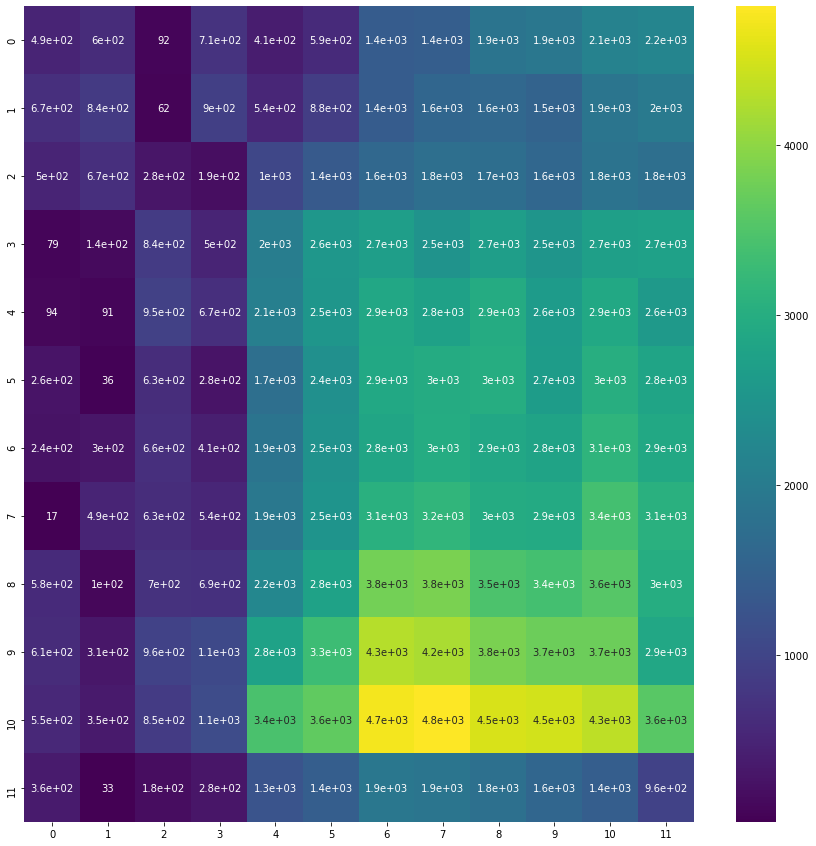

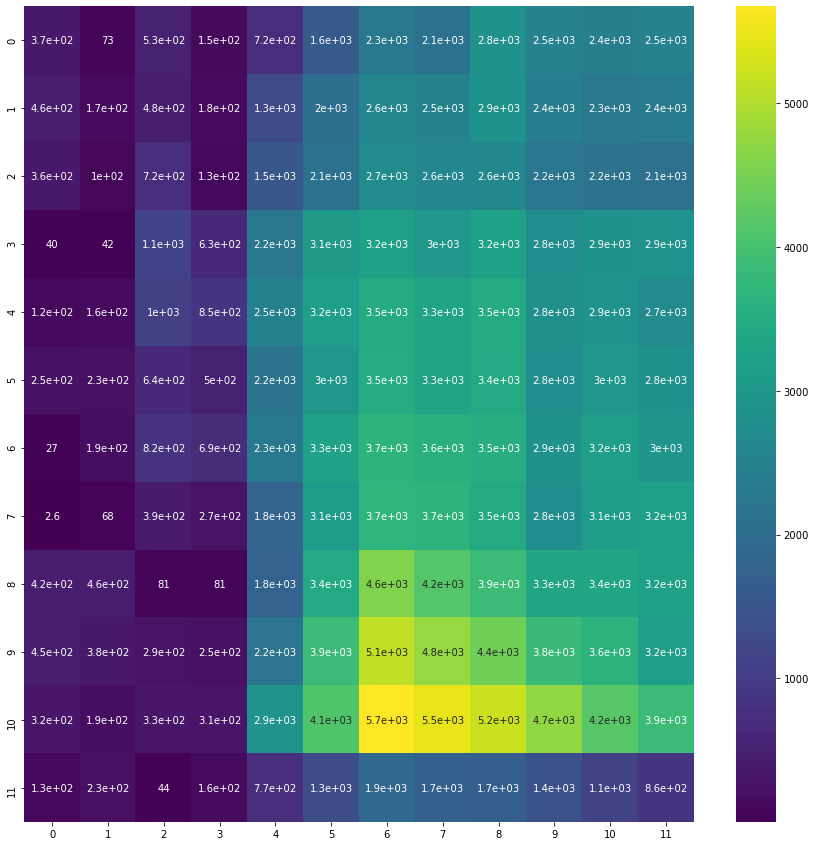

In [43]:
for batch in range(0,10):
    a = tmp[0]
    sum_ = 0
    tmp_result = []
    real_result = []
    for layer_num in range(0, 12):
        sum_ = 0
        #print(i,'번째 레이어\n', a[i][z])
        for token_num in range(0, 768):
            for seq_len in range(0, 128):
                sum_ = sum_ + (a[layer_num][batch][seq_len][token_num])
            if (token_num+1)%64 == 0:
                tmp_result.append(abs(sum_)) # 토큰에 128x64의 합..
                                             # 0번째 레이어의 12개 토큰이 tmp_result에 저장됨.
        real_result.append(tmp_result)
        # 최종적으로 real_result에는 12개의 레이어 x 12개의 토큰이 저장됨.
    a = list(map(lambda x: x.numpy(), real_result[0]))

    m1 = []
    m2 = []
    for cnt, _ in enumerate(a):
        m1.append(_)
        if (cnt+1)%12 == 0:
            m2.append(m1)
            m1=[]

    plt.figure(figsize=(15,15))
    sns.heatmap(m2, cmap='viridis', annot=True) #숫자 출력
    plt.savefig('./image/image'+str(batch)+'.png', format='png', dpi=300)
    #plt.show()
    # 행 -> layer
    # 열 -> Head